# Mini Project 
# Partie 1 

## Importation des bibliothèques


In [2249]:
import pandas as pd
import matplotlib.pyplot as plt

1. Faire les traitements nécessaires pour charger et fusionner les fichiers.


In [2250]:
def concatenate_files(path1: str, path2: str, delem: str = ";") -> pd.DataFrame:
    """this function takes two csv files and concatenate them into one dataframe"""
    # Read the files
    filep1 = pd.read_csv(path1, delimiter=delem, decimal=",")
    filep2 = pd.read_csv(path2, delimiter=delem, decimal=",")
    # rename the last column for the two files
    filep2.rename(columns={"m": "Price"}, inplace=True)
    # return Concatenate the files
    return pd.concat([filep1, filep2])

In [2251]:
concatenated_df = concatenate_files(
    "dataset_P1(Nov2013-June2014).csv", "dataset_P2(July2014-January2015).csv"
)
# Convert the Price column to numeric values
concatenated_df["Price"] = pd.to_numeric(concatenated_df["Price"], errors="coerce")
print(concatenated_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 12725 entries, 0 to 5921
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_ID    12725 non-null  int64  
 1   Date_purchase  12710 non-null  object 
 2   Price          12704 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 397.7+ KB
None


2. Pour chaque colonne donner le nombre de valeurs manquantes.

In [2252]:
def calculate_null_values(df: pd.DataFrame) -> pd.DataFrame:
    """function takes a dataframe and return the number of null values for each column
    parameters : df : dataframe
    """
    # return the null values
    return df.isnull().sum()

In [2253]:
null_values = concatenated_df.isnull().sum()
print(null_values)

Customer_ID       0
Date_purchase    15
Price            21
dtype: int64


3. Afficher un data frame avec toutes les lignes qui ont au moins une valeur manquante.

In [2254]:
def return_lines_with_null_values(df: pd.DataFrame) -> pd.DataFrame:
    # return the lines with null values in any column
    return df[df.isnull().any(axis=1)]

In [2255]:
lines_null_values = return_lines_with_null_values(concatenated_df)
print(lines_null_values)

      Customer_ID  Date_purchase   Price
0               1     02/11/2013     NaN
2               3     05/11/2013     NaN
65             36            NaN   784.0
194            57     01/12/2013     NaN
230            64            NaN     NaN
278            74            NaN   444.0
318            77     01/03/2014     NaN
351            81            NaN   343.0
453            94            NaN     NaN
519           104            NaN    97.0
584           113            NaN    48.0
636           123     08/03/2014     NaN
693           131     22/01/2014     NaN
708           135     11/03/2014     NaN
738           139            NaN  6703.0
798           152            NaN     NaN
852           159            NaN   134.0
942           170            NaN   722.0
996           174     14/05/2014     NaN
1456          232     28/03/2014     NaN
1725          276            NaN   174.0
1780          284  Date_purchase     NaN
1791          285     12/03/2014     NaN
1861          29

4. Supprimer ensuite toutes les lignes avec des valeurs manquantes.

In [2256]:
# drop the lines with null values
concatenated_df.dropna(inplace=True)
print(concatenated_df)

      Customer_ID Date_purchase  Price
1               2    04/11/2013  350.0
3               4    07/11/2013  120.0
4               5    07/11/2013  120.0
5               6    07/11/2013  120.0
6               7    07/11/2013   69.0
...           ...           ...    ...
5917         1715    26/08/2014  301.0
5918         1715    31/10/2014   35.0
5919         1715    27/09/2014   35.0
5920         1715    16/07/2014  248.0
5921         1715    11/12/2014  424.0

[12692 rows x 3 columns]


5. Vérifier les dates des transactions afin de garder que celles qui sont effectuées par les
clients dans la période d’étude

In [2257]:
def filter_date(df: pd.DataFrame) -> pd.DataFrame:
    # Vérifiez d'abord que la colonne 'Date_purchase' est au bon format de date
    # erros = coerce permet de remplacer les valeurs non conforme par NaT
    df["Date_purchase"] = pd.to_datetime(
        df["Date_purchase"], format="%d/%m/%Y", errors="coerce"
    )

    # Définissez les dates minimales et maximales de la période d'étude
    min_date = pd.to_datetime("2013-11-01")
    max_date = pd.to_datetime("2015-02-28")

    return df[(df["Date_purchase"] >= min_date) & (df["Date_purchase"] <= max_date)]

In [2258]:
concatenated_df = filter_date(concatenated_df)
print(concatenated_df)

      Customer_ID Date_purchase  Price
1               2    2013-11-04  350.0
3               4    2013-11-07  120.0
4               5    2013-11-07  120.0
5               6    2013-11-07  120.0
6               7    2013-11-07   69.0
...           ...           ...    ...
5917         1715    2014-08-26  301.0
5918         1715    2014-10-31   35.0
5919         1715    2014-09-27   35.0
5920         1715    2014-07-16  248.0
5921         1715    2014-12-11  424.0

[12686 rows x 3 columns]


6. Afficher les statistiques descriptives de base.


In [2259]:
# statistics of dataframe
print(concatenated_df.describe())

        Customer_ID                  Date_purchase         Price
count  12686.000000                          12686  12686.000000
mean     740.037837  2014-06-11 18:33:12.117294592    392.758315
min        2.000000            2013-11-01 00:00:00     29.000000
25%      356.250000            2014-03-05 00:00:00    150.000000
50%      632.000000            2014-06-15 00:00:00    297.000000
75%     1122.000000            2014-09-23 18:00:00    522.000000
max     4445.000000            2015-01-29 00:00:00  29000.000000
std      468.014756                            NaN    511.112074


7. Vérifier s’il y a des valeurs aberrantes dans la colonne Price

In [2260]:
def identify_outlier(df : pd.DataFrame) -> pd.DataFrame:
    # Calcul des quartiles et de l'écart interquartile (IQR) || indexation slicing
    Q1 = df["Price"].quantile(0.25)
    Q3 = df["Price"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Identification des valeurs aberrantes
    outliers = df[(df["Price"] < lower_bound) | (df["Price"] > upper_bound)]
    print("Valeurs aberrantes détectées :")
    print(outliers)

In [2261]:
identify_outlier(concatenated_df)

Valeurs aberrantes détectées :
      Customer_ID Date_purchase   Price
39             26    2013-12-11  1648.0
41             27    2014-03-14  4567.0
64             35    2013-11-14  4192.0
93             43    2014-05-07  3690.0
240            67    2014-01-06  1154.0
...           ...           ...     ...
5557         1532    2014-10-05  1219.0
5605         1554    2014-08-11  1260.0
5614         1554    2014-10-29  1305.0
5790         1646    2014-11-25  1095.0
5796         1646    2014-08-12  1139.0

[447 rows x 3 columns]


7. Explication : Les valeurs aberrantes peuvent apparaître pour diverses raisons, telles que des erreurs de saisie ou de mesure, des erreurs dans les données, ou elles peuvent être des valeurs légitimes qui représentent une variation réelle dans les données.

8. le mois qui a enregistré le plus grand nombre de ventes et le montant total de ce mois 

In [2262]:
def max_sales_in_mont(df: pd.DataFrame) -> pd.DataFrame:
    # group by mont
    df["Month"] = df["Date_purchase"].dt.month
    sales_by_month = df.groupby("Month").agg({"Price": ["count", "sum"]})
    print(sales_by_month)
    max_sales_month = sales_by_month["Price"]["count"].idxmax()
    # return the sum of price of max sales month
    price_total = sales_by_month["Price"]["sum"][max_sales_month]
    return max_sales_month, price_total

In [2263]:
result = max_sales_in_mont(concatenated_df)
month,totalPrice = result[0], result[1]
print("Le mois où les ventes sont les plus importantes est le mois de : ", month)
print("Le montant total des ventes pour ce mois est de : ", totalPrice)

      Price           
      count        sum
Month                 
1       994  401940.00
2       856  329738.00
3      1014  390248.00
4       972  346718.00
5       908  338582.00
6       821  296689.00
7       940  338690.00
8      1054  404342.00
9      1009  439230.00
10     1154  483989.00
11     1561  670434.50
12     1403  541931.49
Le mois où les ventes sont les plus importantes est le mois de :  11
Le montant total des ventes pour ce mois est de :  670434.5


9. Afficher un graphe qui montre l’évolution du montant total par mois

In [2264]:
def plot_monthly_sales_evolution(df):
    # Group by 'Month' and calculate the sum of 'Price' for each month
    monthly_sales = df.groupby("Month")["Price"].sum()

    # Plot the results
    plt.figure(figsize=(12, 6))
    monthly_sales.plot(kind="line", marker="o")
    plt.title("Evolution du montant total des ventes par mois")
    plt.xlabel("Mois")
    plt.ylabel("Montant Total")
    plt.grid(True)

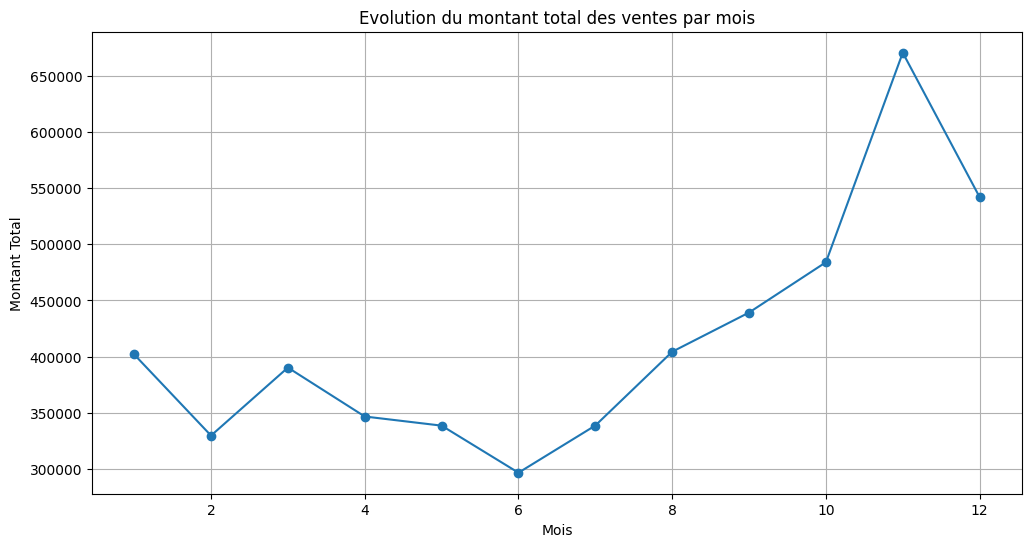

In [2265]:
plot_monthly_sales_evolution(concatenated_df)
# print client sorted by userId


10. Creation des variables pour chaque client

In [2266]:
def create_variable_client(df: pd.DataFrame) -> pd.DataFrame:
    client_df = pd.DataFrame(df["Customer_ID"].unique(), columns=["Customer_ID"])
    # Fréquence : Nombre de transactions observées au cours de la période analysée.
    frequency = df.groupby("Customer_ID")["Customer_ID"].count()
    client_df["Frequency"] = frequency.values
    # change frequency that are equal to 1 to 2
    frequency[frequency == 1] = 2
    # Récence : le nombre de jours entre le premier jour de la période d'étude et le jour du dernier achat
    rencency = df.groupby("Customer_ID")["Date_purchase"].max() - pd.to_datetime(
        "2013-11-01"
    )
    client_df["Recency"] = rencency.values
    # Longueur : nombre de jours entre le premier et le dernier achat (Longueur de la relation client/site e-commerce)
    lenght = (
        df.groupby("Customer_ID")["Date_purchase"].max()
        - df.groupby("Customer_ID")["Date_purchase"].min()
    )
    client_df["Length"] = lenght.values
    #  Montant : le montant total dépensé par le client au cours de la période analysée.(MAD)
    amount = df.groupby("Customer_ID")["Price"].sum()
    client_df["Amount"] = amount.values
    # NbrP1 : indique le nombre des transactions observées dans la première période. (01/11/2013 - 30/06/2014)
    nbrP1 = (
        df[df["Date_purchase"] <= pd.to_datetime("2014-06-30")]
        .groupby("Customer_ID")["Customer_ID"]
        .count()
    )
    client_df["NbrP1"] = client_df["Customer_ID"].map(nbrP1).fillna(0)
    # NbrP2 : indique le nombre des transactions observées dans la deuxième période. (01/07/2014 - 28/02/2015)
    nbrP2 = (
        df[df["Date_purchase"] > pd.to_datetime("2014-06-30")]
        .groupby("Customer_ID")["Customer_ID"]
        .count()
    )
    client_df["NbrP2"] = client_df["Customer_ID"].map(nbrP2).fillna(0)
    # Inter_achat : Nombre moyen de jours entre les achats.
    inter_achat = lenght / (frequency - 1)
    client_df["Inter_achat"] = inter_achat.values
    # replace NaT with 0 days
    client_df["Inter_achat"] = client_df["Inter_achat"].fillna(pd.Timedelta(days=0))
    # sort id client
    client_df.sort_values(by=["Customer_ID"], inplace=True)
    return client_df

In [2267]:
# create client df sorted by Customer_ID
client_df = create_variable_client(concatenated_df)
print(client_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1717 entries, 0 to 1672
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   Customer_ID  1717 non-null   int64          
 1   Frequency    1717 non-null   int64          
 2   Recency      1717 non-null   timedelta64[ns]
 3   Length       1717 non-null   timedelta64[ns]
 4   Amount       1717 non-null   float64        
 5   NbrP1        1717 non-null   float64        
 6   NbrP2        1717 non-null   float64        
 7   Inter_achat  1717 non-null   timedelta64[ns]
dtypes: float64(3), int64(2), timedelta64[ns](3)
memory usage: 120.7 KB
None


11. Afficher les statistiques descriptives de base (min, max, moyenne, ecart type) pour les
variables Longueur, Récence, Fréquence et Montant.

In [2268]:
selected_columns = ["Frequency", "Recency", "Length", "Amount"]
# show statistics of selected columns only min, max, mean, std
print(client_df[selected_columns].agg(["min", "max", "mean", "std"]))

      Frequency                     Recency                      Length  \
min    1.000000             1 days 00:00:00             0 days 00:00:00   
max   20.000000           454 days 00:00:00           440 days 00:00:00   
mean   7.388468 274 days 05:14:30.122306348 143 days 01:38:57.798485730   
std    5.387972 135 days 08:51:00.095337952 117 days 08:44:47.461990072   

            Amount  
min      69.000000  
max   29000.000000  
mean   2901.882347  
std    2959.656824  


# Partie 2
1. Comment interpréter la valeur 0 dans la colonne Inter_achat : # r= cela signifie que le client n'a fait qu'un seul achat ou bien que le client a fait plusieurs achats le même jour 
Remplacer cette valeur par la valeur moyenne de cette colonne (en prenant en compte que les valeurs différentes à zéro).

In [2269]:
# Remplacer cette valeur par la valeur moyenne de cette colonne (en prenant en compte que les valeurs différentes à zéro).
def change_zero_value(df: pd.DataFrame) -> pd.DataFrame:
    mean_inter_achat = df[df["Inter_achat"] != 0]["Inter_achat"].mean()
    print(mean_inter_achat)
    df["Inter_achat"] = df["Inter_achat"].replace(pd.Timedelta(days=0), mean_inter_achat)
    return df

In [2270]:
client_df = change_zero_value(client_df)
print(client_df['Inter_achat'])

37 days 23:10:59.388924950
0      37 days 23:10:59.388924950
1      37 days 23:10:59.388924950
2      37 days 23:10:59.388924950
3      37 days 23:10:59.388924950
4      37 days 23:10:59.388924950
                  ...            
1413            289 days 00:00:00
1414             44 days 00:00:00
1415             16 days 12:00:00
1526            173 days 00:00:00
1672              9 days 00:00:00
Name: Inter_achat, Length: 1717, dtype: timedelta64[ns]


2. Sauvegarder le data frame final sous le nom "LRFMP1P2IT.xlsx" avec comme première
colonne Customer_ID.

In [2271]:
client_df.to_excel("./LRFMP1P2IT.xlsx", index=False)


3. Charger le fichier généré par le modèle de clustering ("Clustering_Model_result.json")
sous forme d’un DataFrame.

In [2272]:
clustering_model = pd.read_json("./Clustering_Model_result.json")
print(clustering_model)

      Customer_ID  Frequency   Recency    Length  Monetary    Cluster
0               1  -1.185691 -2.011266 -1.219013 -0.988066  cluster_5
1               2  -1.185691 -1.996520 -1.219013 -0.888919  cluster_5
2               3  -1.185691 -1.989147 -1.219013 -0.988066  cluster_5
3               4  -1.185691 -1.974402 -1.219013 -0.970071  cluster_5
4               5  -1.185691 -1.974402 -1.219013 -0.970071  cluster_5
...           ...        ...       ...       ...       ...        ...
1712         1713  -0.814494  0.886274  0.996309 -0.495858  cluster_2
1713         1714  -0.443296 -1.583639 -1.031562 -0.676864  cluster_5
1714         1715   0.855894  0.967375  2.180654 -0.089390  cluster_1
1715         1716  -0.443296 -0.875843 -0.844112  0.006581  cluster_0
1716         1717  -1.000092 -1.340334 -1.142328 -0.525497  cluster_5

[1717 rows x 6 columns]


4. les traitements nécessaires pour ajouter au dernier DataFrame généré dans la partie une nouvelle colonne nommé Cluster, qui indique le N° du Cluster de chaque client.

In [2273]:
def map_cluster(clients: pd.DataFrame , model : pd.DataFrame) -> pd.DataFrame:
    # map the cluster to the client
    clients["Cluster"] = model["Cluster"].values
    return clients    

In [2274]:
client_df = map_cluster(client_df, clustering_model)
print(client_df)

      Customer_ID  Frequency  Recency   Length  Amount  NbrP1  NbrP2  \
0               2          1   3 days   0 days   350.0    1.0    0.0   
1               4          1   6 days   0 days   120.0    1.0    0.0   
2               5          1   6 days   0 days   120.0    1.0    0.0   
3               6          1   6 days   0 days   120.0    1.0    0.0   
4               7          1   6 days   0 days    69.0    1.0    0.0   
...           ...        ...      ...      ...     ...    ...    ...   
1413         1715          2 360 days 289 days   808.0    6.0    6.0   
1414         1716          4 367 days 132 days  1443.0    5.0    0.0   
1415         1717          3 118 days  33 days  1009.0    2.0    0.0   
1526         4444          3 394 days 346 days  1413.0    0.0    1.0   
1672         4445          2  31 days   9 days  1134.0    0.0    1.0   

                    Inter_achat    Cluster  
0    37 days 23:10:59.388924950  cluster_5  
1    37 days 23:10:59.388924950  cluster_5  


5. Pour chaque groupe de client, calculer le nombre correspondant de clients, la longueur
moyenne (L), la récence moyenne (R), la fréquence moyenne (F), le montant moyen (M).

In [2275]:
def calculate_mean(df: pd.DataFrame) -> pd.DataFrame:
    # Check if the dataframe has the original columns or the renamed ones

 
    selected_columns = ["Length", "Recency", "Frequency", "Amount"]
    # convert lenght to number of days 
    df["Length"] = df["Length"].dt.days
    # convert recency to number of days 
    df["Recency"] = df["Recency"].dt.days
    # calculate mean of each column for each cluster 
    df_stats = df.groupby("Cluster")[selected_columns].mean()
    # add column that calculate number of client in each cluster
    # Rename columns only if they are the original names
    df_stats.rename(
        columns={
            "Length": "Mean(L)",
            "Recency": "Mean(R)",
            "Frequency": "Mean(F)",
            "Amount": "Mean(M)",
            },
        inplace=True,
        )
    df_stats.insert(0, "Count",  df.groupby("Cluster")["Customer_ID"].count())
    return df_stats
# convert Lengh and recency to timedelta
client_df["Length"] = pd.to_timedelta(client_df["Length"], unit="d")
client_df["Recency"] = pd.to_timedelta(client_df["Recency"], unit="d")
statistics_df = calculate_mean(client_df)
print(statistics_df)

           Count     Mean(L)     Mean(R)   Mean(F)      Mean(M)
Cluster                                                        
cluster_0    262  130.194656  245.446565  6.919847  2623.767176
cluster_1    189  145.185185  301.386243  8.142857  3038.285714
cluster_2    339  149.887906  283.445428  7.064897  2930.982301
cluster_3    250  155.028000  291.308000  7.776000  3190.164000
cluster_4    138  151.913043  293.398551  8.282609  3117.702899
cluster_5    377  128.755968  244.716180  6.023873  2351.132599
cluster_6    162  154.469136  295.691358  9.759259  3784.598765


In [2276]:
# function that add a pattern to statistics dataframe comparing the mean of each of each column to the mean of the row in client dataframe if the mean of the column is greater than the mean of the row in client dataframe then the pattern is the letter between () in statistics df else it's *
def add_lrfm_pattern(statistics_df : pd.DataFrame, client_df : pd.DataFrame) -> pd.DataFrame:
    # Calculate the mean of the specific columns in the client dataframe
    mean_columns = client_df[["Length", "Recency", "Frequency", "Amount"]].mean()

    # Function to generate the pattern for each row in statistics dataframe
    def generate_pattern(row):
        pattern = "( "
        pattern +=   "L"  if row["Mean(L)"] > mean_columns["Length"] else "l"
        pattern +=   "R"  if row["Mean(R)"] > mean_columns["Recency"] else "r"
        pattern +=   "F"  if row["Mean(F)"] > mean_columns["Frequency"] else "f"
        pattern +=   "M"  if row["Mean(M)"] > mean_columns["Amount"] else "m"
        pattern += " )"
        return pattern

    # Apply the function to each row in the statistics dataframe
    statistics_df["LRFM-Pattern"] = statistics_df.apply(generate_pattern, axis=1)
    print(mean_columns)
    return statistics_df


add_lrfm_pattern(statistics_df, client_df)

Length        143.068725
Recency       274.218404
Frequency       7.388468
Amount       2901.882347
dtype: float64


,Count,Mean(L),Mean(R),Mean(F),Mean(M),LRFM-Pattern
Cluster,,,,,,
cluster_0,262,130.194656,245.446565,6.919847,2623.767176,( lrfm )
cluster_1,189,145.185185,301.386243,8.142857,3038.285714,( LRFM )
cluster_2,339,149.887906,283.445428,7.064897,2930.982301,( LRfM )
cluster_3,250,155.028000,291.308000,7.776000,3190.164000,( LRFM )
cluster_4,138,151.913043,293.398551,8.282609,3117.702899,( LRFM )
cluster_5,377,128.755968,244.716180,6.023873,2351.132599,( lrfm )
cluster_6,162,154.469136,295.691358,9.759259,3784.598765,( LRFM )


7. Interpréter les résultats obtenus.

- **Cluster 0,5 (lrfm)**: Les clients de ce cluster ont une faible longueur de relation (L) en comparaison avec la moyenne générale, suggérant qu'ils sont relativement nouveaux. Leurs achats ne sont pas récents (R), la fréquence (F) d'achat est basse et ils dépensent moins (M) que la moyenne.

- **Cluster 1, 3, 4, 6 (LRFM)**: Ces clusters montrent des valeurs supérieures à la moyenne sur tous les aspects. Cela indique des clients avec une longue relation avec l'entreprise (L), des achats récents (R), une fréquence d'achat élevée (F) et des dépenses supérieures (M). Cela suggère des clients fidèles et engagés qui ont des habitudes d'achat fréquentes et des interactions fréquentes avec l'entreprise.

- **Cluster 2 (LRfM)**: Les clients de ce cluster ont une relation de longueur moyenne (L), des achats pas si récents (R), une fréquence d'achat basse (F), mais dépensent plus (M) que la moyenne générale.



8. Réaliser les visualisations suivantes :


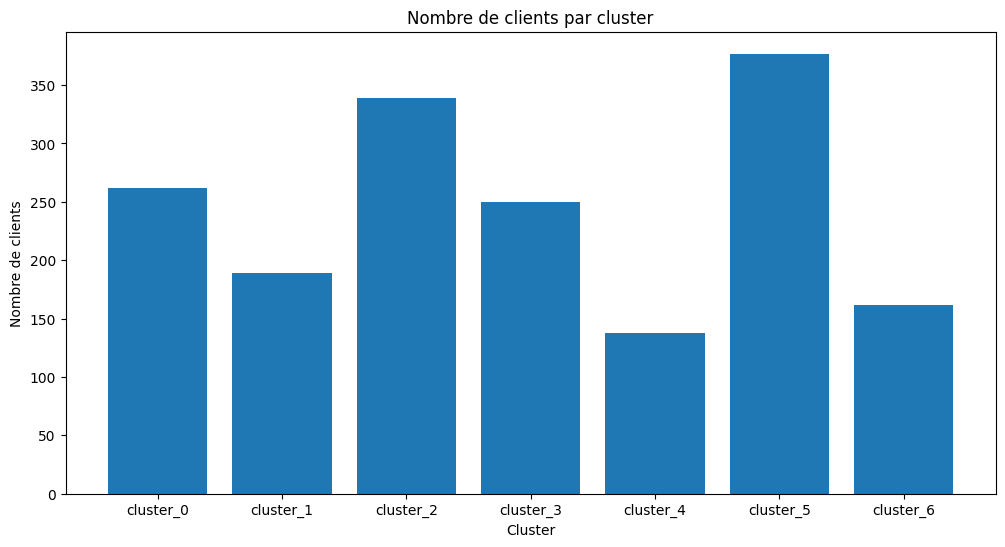

In [2277]:
#a. Nombre de clients par Cluster
def plot_cluster_count(df: pd.DataFrame):
    plt.figure(figsize=(12, 6))
    plt.bar(df.index, df["Count"])
    plt.title("Nombre de clients par cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Nombre de clients")
plot_cluster_count(statistics_df)

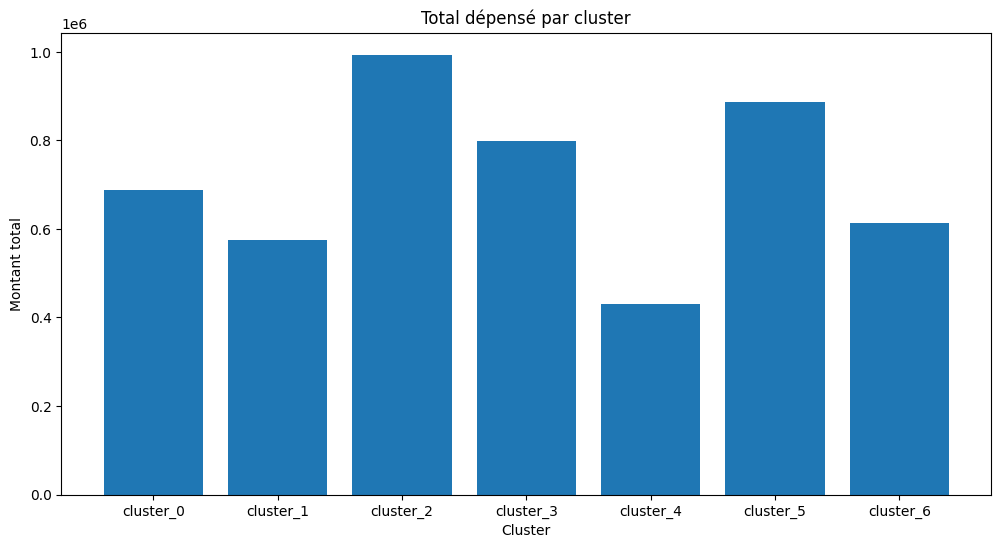

In [2278]:
# b. Total dépensé par Cluster
def plot_cluster_amount(df_clt: pd.DataFrame):
    # sum of amount for each cluster
    df_amount = df_clt.groupby("Cluster")["Amount"].sum()
    plt.figure(figsize=(12, 6))
    plt.bar(df_amount.index, df_amount.values)
    plt.title("Total dépensé par cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Montant total")
plot_cluster_amount(client_df)



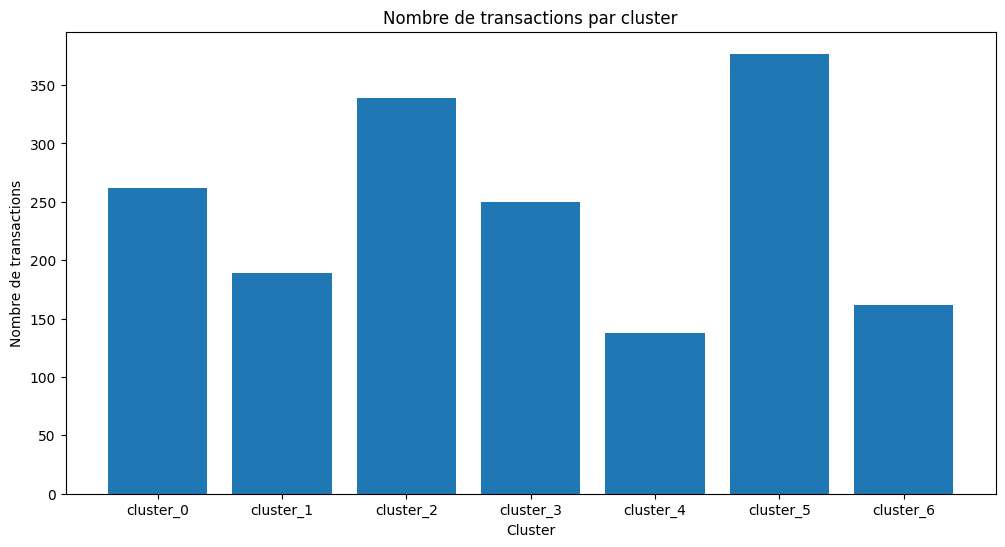

In [2279]:
# c. Nombre de transaction par Cluster
def plot_cluster_transaction(df_clt: pd.DataFrame):
    # Group by 'Cluster' and calculate the sum of 'Frequency' for each cluster
    cluster_transaction = df_clt.groupby("Cluster")["Frequency"].count()
    plt.figure(figsize=(12, 6))
    plt.bar(cluster_transaction.index, cluster_transaction.values)
    plt.title("Nombre de transactions par cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Nombre de transactions")
plot_cluster_transaction(client_df)

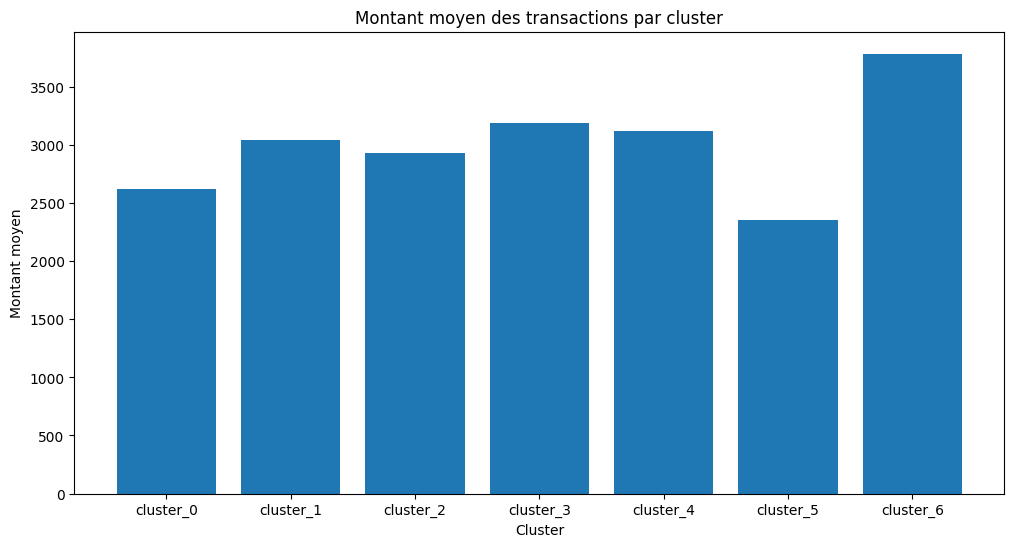

In [2280]:
# d. Panier moyen par Cluster
def plot_cluster_amount(df_stats : pd.DataFrame):
    plt.figure(figsize=(12, 6))
    plt.bar(df_stats.index, df_stats["Mean(M)"])
    plt.title("Montant moyen des transactions par cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Montant moyen")
plot_cluster_amount(statistics_df)

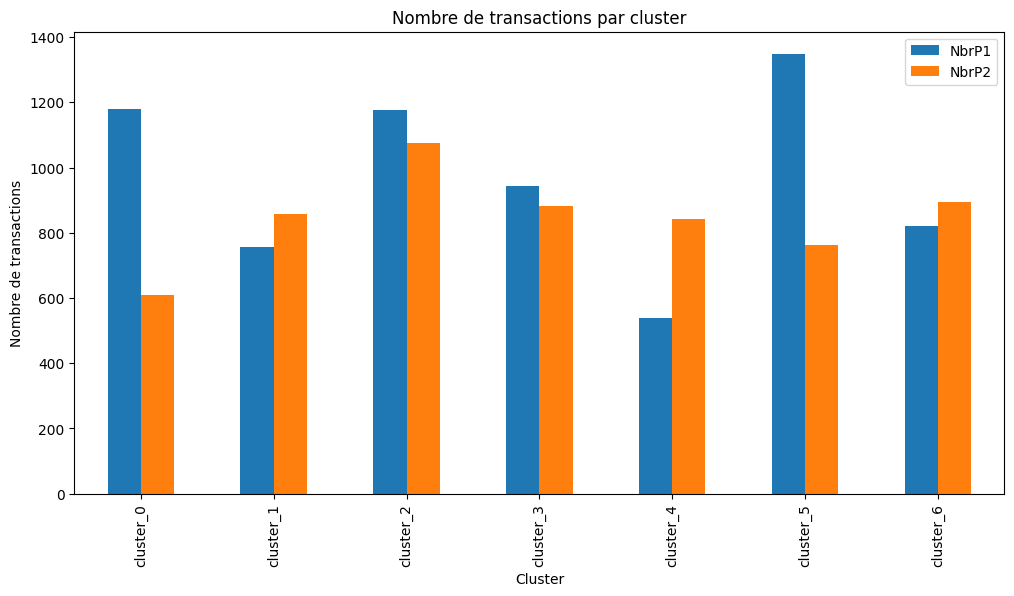

In [2281]:
# e. Pour le cluster qui représente les nouveaux clients, réaliser un graphe qui montre la comparaison entre le NbrP1 et NbrP2
def plot_new_client(df_clt: pd.DataFrame):
    # Group by 'Cluster' and calculate the sum of 'Frequency' for each cluster
    new_client = df_clt.groupby("Cluster")[["NbrP1", "NbrP2"]].sum()
    new_client.plot(kind="bar", figsize=(12, 6))
    plt.title("Nombre de transactions par cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Nombre de transactions")
plot_new_client(client_df)       